In [106]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [115]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from neurosim.models.ssr import StateSpaceRealization as SSR
from tqdm import tqdm

In [108]:
A = np.diag(np.random.uniform(0.1, 0.9, size=(10,)))
B = np.eye(A.shape[0])
C = np.zeros(A.shape[0])
C = np.zeros((2, A.shape[0]))
C[0, 5] = 1
C[1, 3] = 1

In [109]:
# For normal A, the minimum phase image is simply given by C itself
Bmin = C.T

In [110]:
ssr = SSR(A = A, B=B, C=C)

In [111]:
ssr.solve_min_phase()

Verifying the equations in the Shaked paper as we go along

In [75]:
# 3.8
C @ (ssr.P - ssr.Pmin) @ C.T

array([[ 1.00000000e+00, -3.18549408e-32],
       [ 3.18549408e-32,  1.00000000e+00]])

In [113]:
np.trace(ssr.P- ssr.Pmin)

18.099905130036248

In [77]:
# 3.12, the Kalman gain

In [78]:
ssr.Bmin @ np.linalg.inv(ssr.Dmin)

array([[ 0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 2.50592563e-32,  7.86667804e-01],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 4.51757341e-01, -1.17299727e-32],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00]])

In [79]:
A @ Bmin @ np.linalg.inv(C @ Bmin)

array([[0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.7866678 ],
       [0.        , 0.        ],
       [0.45175734, 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ]])

In [ ]:
# Verify that the transmission zeros of the system are described by 3.16

In [69]:
N = scipy.linalg.null_space(C)
M = scipy.linalg.null_space(Bmin.T)

In [67]:
N.shape

(10, 9)

In [70]:
N.T @ A @ M

array([[0.49916653, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.48924985, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.8424245 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.336266  , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.77752352,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.40155131, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.45912494, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.29647428, 0.        ],


### Feedforward chain with equal off diagonal weights

In [95]:
#A = np.diag(np.random.uniform(0.1, 0.9, size=(10,)))
A = np.diag(0.75 * np.ones(10))
alpha = 0.1
for i in range(A.shape[0] - 1):
    A[i, i + 1] = alpha

B = np.eye(A.shape[0])
C = np.zeros((1, A.shape[0]))

C[0, 5] = 1
#C[1, 3] = 1

In [96]:
ssr = SSR(A = A, B=B, C=C)

In [97]:
ssr.solve_min_phase()

In [98]:
ssr.Bmin

array([[-1.07134448e-19],
       [-8.57075588e-19],
       [-3.42830235e-18],
       [ 0.00000000e+00],
       [ 1.01200145e-01],
       [ 7.77327228e-01],
       [ 1.40752137e-01],
       [ 2.53748648e-02],
       [ 4.42596446e-03],
       [ 6.14329746e-04]])

In [99]:
eig, U = scipy.linalg.eig(ssr.P)

In [100]:
eigorder = np.argsort(eig)[::-1]
U = U[:, eigorder]

In [101]:
U[:, 0]

array([-0.15093829, -0.26158246, -0.34979412, -0.40801078, -0.43125003,
       -0.41755925, -0.36826823, -0.28819068, -0.18633753, -0.07895679])

In [102]:
ssr.Bmin @ np.linalg.inv(ssr.Dmin)

array([[-1.05863928e-19],
       [-8.46911422e-19],
       [-3.38764569e-18],
       [ 0.00000000e+00],
       [ 1.00000000e-01],
       [ 7.68108808e-01],
       [ 1.39082939e-01],
       [ 2.50739412e-02],
       [ 4.37347640e-03],
       [ 6.07044333e-04]])

In [104]:
scipy.linalg.subspace_angles(U[:, 0][:, np.newaxis], ssr.Bmin)

array([1.00341336])

## *Solve* the 2D case systematically

In [105]:
# Case when l1 > l2

In [184]:
l1 = 0.85
l2 = 0.75
alpha = np.linspace(0, 0.35)

vP_max = np.zeros((alpha.size, 2))

theta = np.linspace(0, np.pi)
K = np.zeros((alpha.size, theta.size, 2))
CC = np.zeros((alpha.size, theta.size, 2))
traceM = np.zeros((alpha.size, theta.size))

for i, alpha_ in tqdm(enumerate(alpha)):
    A = np.array([[l1, alpha_], [0, l2]])
    ssr = SSR(A = A, B=np.eye(A.shape[0]), C=np.eye(A.shape[0]))
    eig, U = np.linalg.eig(ssr.P)
    eigorder = np.argsort(eig)[::-1]
    vP_max[i, :] = U[:, eigorder][:, 0]
    
    for j, theta_ in enumerate(theta):
        
        # Set the readout to be a rotation by theta of the leading eigenvector of ssr.P
        R = np.array([[np.cos(theta_), -np.sin(theta_)], [np.sin(theta_), np.cos(theta_)]])
        
        C = R @ U[:, eigorder][:, 0]
        CC[i, j, :] = C
        
        ssr_proj = SSR(A=A, B=np.eye(A.shape[0]), C=C[np.newaxis, :])
        ssr_proj.solve_min_phase()
        K[i, j, :] = np.squeeze(ssr_proj.Bmin @ np.linalg.inv(ssr_proj.Dmin))

        traceM[i, j] = np.trace(ssr_proj.P - ssr_proj.Pmin)

50it [00:02, 21.55it/s]


In [145]:
# Additionally plot the marginal variance

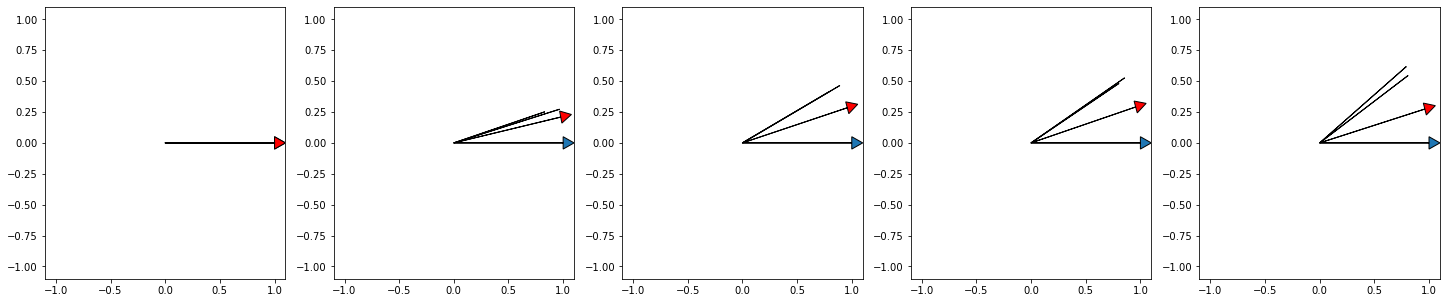

In [185]:
# Plot #1: On a circle, draw the vector of vP_max and (1, 0)
fig, ax = plt.subplots(1, 5, figsize=(25, 5))

for i in range(5):
    ax[i].arrow(0, 0, 1, 0, head_width=0.1, head_length=0.1)
    ax[i].set_xlim([-1.1, 1.1])
    ax[i].set_ylim([-1.1, 1.1])

    ax[i].arrow(0, 0, vP_max[i*10, 0], vP_max[i*10, 1], head_width=0.1, head_length=0.1, facecolor='r')
    ax[i].arrow(0, 0, K[i*10, np.argmin(traceM[i*10, :]), 0], 
                K[i*10, np.argmin(traceM[i*10, :]), 1], facecolor='g')
    ax[i].arrow(0, 0, CC[i*10, np.argmin(traceM[i*10, :]), 0], 
                CC[i*10, np.argmin(traceM[i*10, :]), 1], facecolor='g')
        

In [207]:
 K[alpha_idx, np.argmin(traceM[alpha_idx, :])].shape

(2,)

In [215]:
import matplotlib as mpl

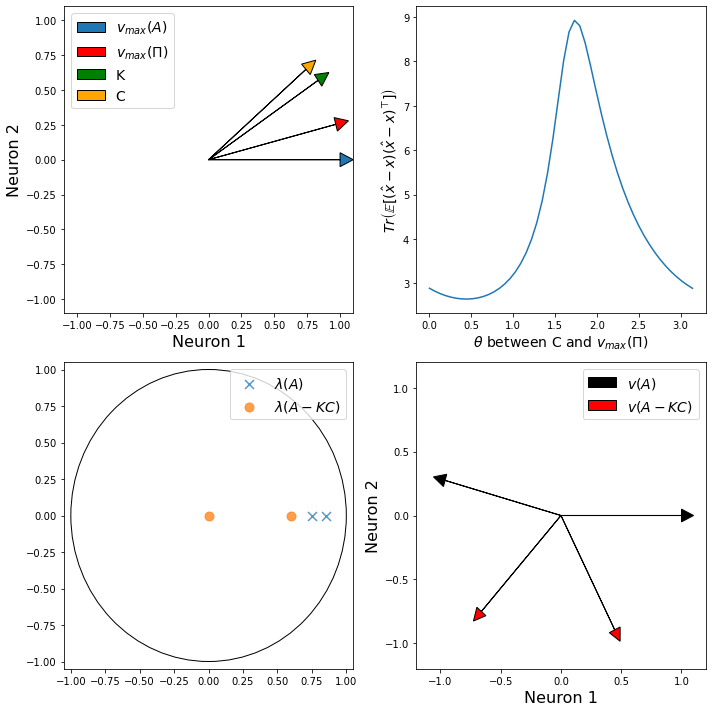

In [234]:
# As a function of alpha, have the (1) arrow plot, (2) KCA cost as a function of theta, (3) Spectrum of A vs. the
# closed loop dynamics matrix
alpha_idx = 49

fig, ax = plt.subplots(2, 2, figsize=(10, 10))

    
ax[0, 0].arrow(0, 0, 1, 0, head_width=0.1, head_length=0.1)
ax[0, 0].set_xlim([-1.1, 1.1])
ax[0, 0].set_ylim([-1.1, 1.1])

ax[0, 0].arrow(0, 0, vP_max[alpha_idx, 0], vP_max[alpha_idx, 1], head_width=0.1, head_length=0.1, facecolor='r')
ax[0, 0].arrow(0, 0, K[alpha_idx, np.argmin(traceM[alpha_idx, :]), 0], 
            K[alpha_idx, np.argmin(traceM[alpha_idx, :]), 1], head_width=0.1, head_length=0.1, facecolor='green')
ax[0, 0].arrow(0, 0, CC[i*10, np.argmin(traceM[alpha_idx, :]), 0], 
            CC[alpha_idx, np.argmin(traceM[alpha_idx, :]), 1], head_width=0.1, head_length=0.1, facecolor='orange')
ax[0, 0].set_xlabel('Neuron 1', fontsize=16)
ax[0, 0].set_ylabel('Neuron 2', fontsize=16)

ax[0, 0].legend([r'$v_{max}(A)$', r'$v_{max}(\Pi)$', 'K', 'C'], fontsize=14, loc='upper left')
    
    
ax[0, 1].plot(theta, traceM[alpha_idx, :])
ax[0, 1].set_xlabel(r'$\theta$' + ' between C and ' + r'$v_{max}(\Pi)$', fontsize=14)    
ax[0, 1].set_ylabel(r'$Tr\left( \mathbb{E}[(\hat{x} - x)(\hat{x} - x)^\top] \right)$', fontsize=14)


A = np.array([[l1, alpha[alpha_idx]], [0, l2]])

eigA, UA = np.linalg.eig(A)

k = K[alpha_idx, np.argmin(traceM[alpha_idx, :])][:, np.newaxis]
c = CC[alpha_idx, np.argmin(traceM[alpha_idx, :])][np.newaxis, :]

eigAK, UAK = np.linalg.eig(A - k @ c)


ax[1, 0].scatter(np.real(eigA), np.imag(eigA), marker='x', s=80, alpha=0.75)
ax[1, 0].scatter(np.real(eigAK), np.imag(eigAK), marker='o', s=80, alpha=0.75)
ax[1, 0].set_xlim([-1.05, 1.05])
ax[1, 0].set_ylim([-1.05, 1.05])
ax[1, 0].legend([r'$\lambda(A)$', r'$\lambda(A - KC)$'], fontsize=14)
circle = mpl.patches.Circle((0, 0), 1, color='black', fill=False)
ax[1, 0].add_patch(circle)

ax[1, 1].arrow(0, 0, UA[0, 0], UA[1, 0], head_width=0.1, head_length=0.1, facecolor='k')
ax[1, 1].arrow(0, 0, UAK[0, 0], UAK[1, 0], head_width=0.1, head_length=0.1, facecolor='r')
ax[1, 1].arrow(0, 0, UA[0, 1], UA[1, 1], head_width=0.1, head_length=0.1, facecolor='k')
ax[1, 1].arrow(0, 0, UAK[0, 1], UAK[1, 1], head_width=0.1, head_length=0.1, facecolor='r')
ax[1, 1].set_xlim([-1.2, 1.2])
ax[1, 1].set_ylim([-1.2, 1.2])
ax[1, 1].legend([r'$v(A)$', r'$v(A - KC)$'], fontsize=14)
ax[1, 1].set_xlabel('Neuron 1', fontsize=16)
ax[1, 1].set_ylabel('Neuron 2', fontsize=16)


fig.tight_layout()
fig.savefig('2DKalman3.pdf', bbox_inches='tight', pad_inches=0)


In [151]:
from neurosim.utils.riccati import innovation_riccati

In [179]:
A = np.array([[l1, alpha_], [0, l2]])
P = np.eye(2)
C = np.array([np.cos(np.pi/4), np.sin(np.pi/4)])[np.newaxis, :]
rho = 0.
R = rho * np.eye(1)
Q = np.eye(2)
B = np.eye(2)
S = np.zeros((2, 1))

In [180]:
P = innovation_riccati(P, A, B, C, S, R, Q)

In [181]:
P

array([[ 1.125  , -0.1875 ],
       [-0.1875 ,  1.28125]])

In [183]:
A @ P @ C.T @ np.linalg.pinv(C @ P @ C.T)

array([[0.82133172],
       [0.57112471]])

### Verify that the 